In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [3]:
dir(iris_dataset)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
iris_dataset.DESCR.splitlines()

['Iris Plants Database',
 '====================',
 '',
 'Notes',
 '-----',
 'Data Set Characteristics:',
 '    :Number of Instances: 150 (50 in each of three classes)',
 '    :Number of Attributes: 4 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 '        - sepal length in cm',
 '        - sepal width in cm',
 '        - petal length in cm',
 '        - petal width in cm',
 '        - class:',
 '                - Iris-Setosa',
 '                - Iris-Versicolour',
 '                - Iris-Virginica',
 '    :Summary Statistics:',
 '',
 '    ============== ==== ==== ======= ===== ====================',
 '                    Min  Max   Mean    SD   Class Correlation',
 '    ============== ==== ==== ======= ===== ====================',
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826',
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 '    petal width:    0.1  2.5   1.20  0.76 

In [5]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

In [8]:
df.shape

(150, 4)

In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target'] = iris_dataset.target

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


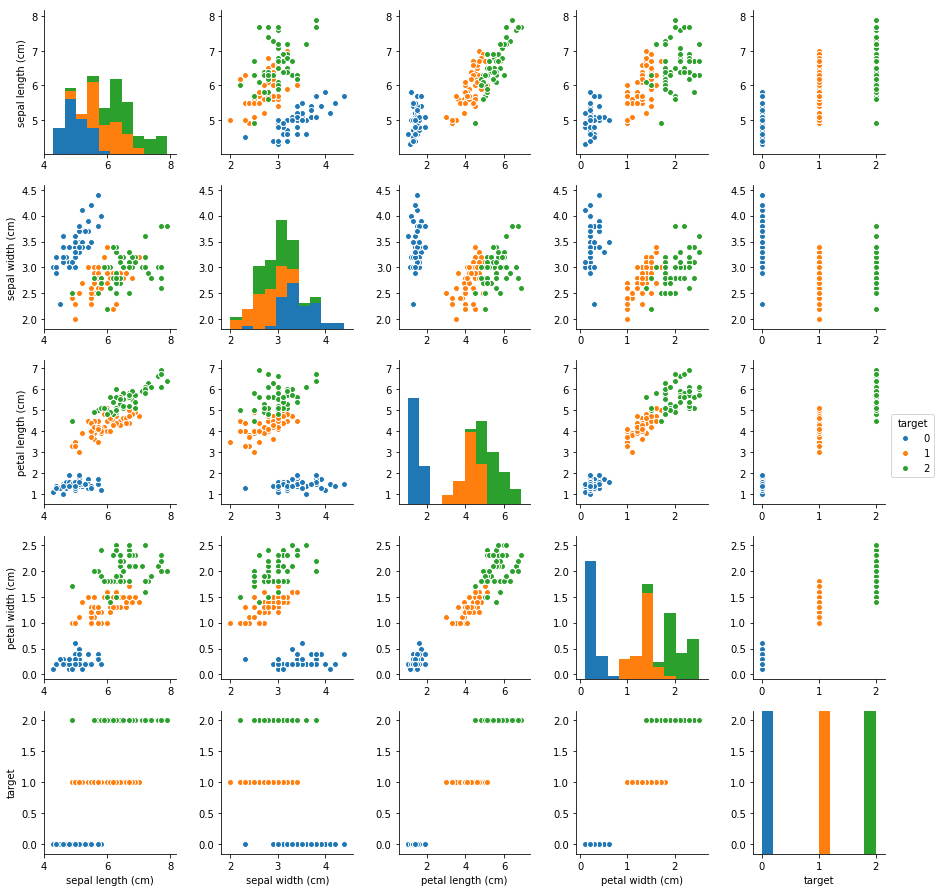

In [14]:
import seaborn as sns

sns.pairplot(df, hue='target')

In [15]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


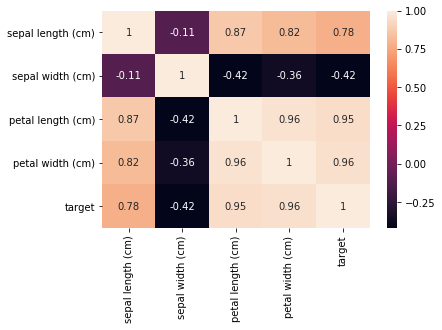

In [16]:
sns.heatmap(df.corr(), annot=True)

In [17]:
X = df.drop('target', axis='columns')
y = df.target

In [18]:
print(X.shape, y.shape)

(150, 4) (150,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [21]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_mdl = RandomForestClassifier()

In [22]:
rf_mdl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
rf_mdl.score(X_train, y_train)

0.9916666666666667

In [24]:
rf_mdl.score(X_test, y_test)

1.0

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_mdl.predict(X_test))
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

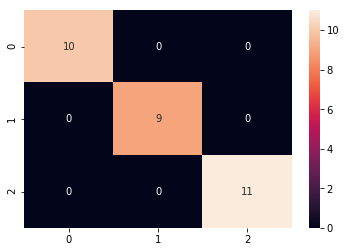

In [26]:
sns.heatmap(cm, annot=True)

In [27]:
from sklearn.datasets import load_digits

digits_dataset = load_digits()

In [28]:
dir(digits_dataset)

['DESCR', 'data', 'images', 'target', 'target_names']

In [29]:
digits_dataset.DESCR.splitlines()

['Optical Recognition of Handwritten Digits Data Set',
 '===================================================',
 '',
 'Notes',
 '-----',
 'Data Set Characteristics:',
 '    :Number of Instances: 5620',
 '    :Number of Attributes: 64',
 '    :Attribute Information: 8x8 image of integer pixels in the range 0..16.',
 '    :Missing Attribute Values: None',
 "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)",
 '    :Date: July; 1998',
 '',
 'This is a copy of the test set of the UCI ML hand-written digits datasets',
 'http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits',
 '',
 'The data set contains images of hand-written digits: 10 classes where',
 'each class refers to a digit.',
 '',
 'Preprocessing programs made available by NIST were used to extract',
 'normalized bitmaps of handwritten digits from a preprinted form. From a',
 'total of 43 people, 30 contributed to the training set and different 13',
 'to the test set. 32x32 bitmaps are divided into non

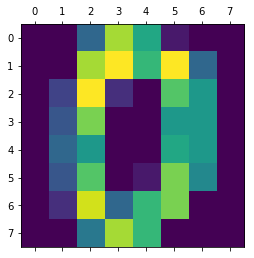

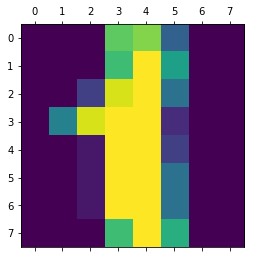

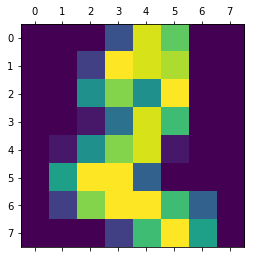

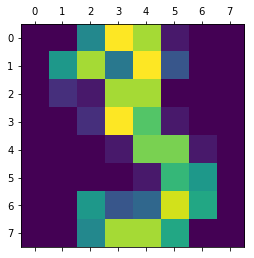

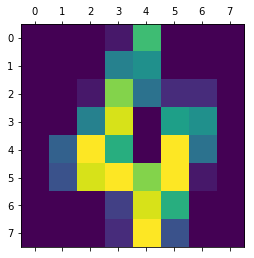

In [31]:
for i in range(5):
    plt.matshow(digits_dataset.images[i])

In [33]:
df = pd.DataFrame(digits_dataset.data)

In [34]:
df.shape

(1797, 64)

In [35]:
df['target'] = digits_dataset.target

In [36]:
df.shape

(1797, 65)

In [38]:
X = df.drop('target', axis = 'columns')
y = df.target

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


In [41]:
# Random forest model

from sklearn.ensemble import RandomForestClassifier

rf_mdl = RandomForestClassifier()

In [42]:
rf_mdl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
rf_mdl.score(X_train, y_train)

0.9986082115518441

In [44]:
rf_mdl.score(X_test, y_test)

0.9611111111111111

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_mdl.predict(X_test))
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  1,  1,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  1,  0, 37]], dtype=int64)

Text(33,0.5,'Actual')

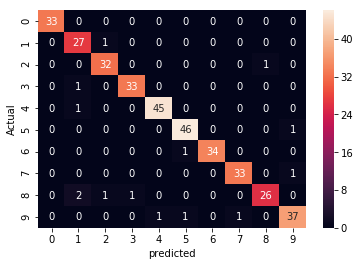

In [48]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')